In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("cleaned_5250.csv")
data.head()
# 1. 年份-发现的天体数量  折线图
# 2. 不同年份区间，发现最远的天体
# 3. 盒子图
# 4. 热图 heatmap
# 5. 小提琴图

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


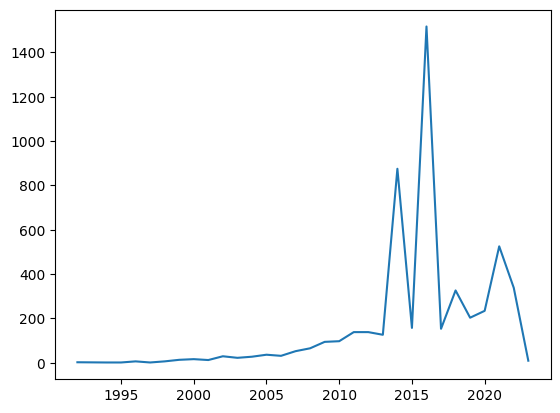

In [4]:
# 1. 年份-发现的天体数量  折线图
year = np.sort(data['discovery_year'].unique())
df = pd.DataFrame(data['discovery_year'], columns=['discovery_year'])
year_num = df.groupby(by=['discovery_year']).size()
num = [year_num[i] for i in year]
plt.plot(year, num)

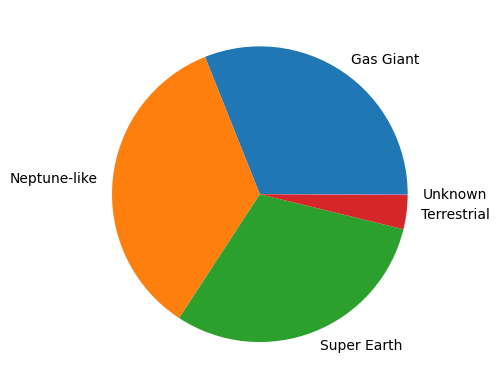

In [5]:
# 2. 不同年份区间，发现最远的天体
df2 = pd.DataFrame(data, columns=['planet_type'])
df2 = df2.dropna(axis=0,how='any')
count = df2.groupby(by=['planet_type']).size()

plt.pie(x=count.values, labels=count.index)
plt.show()







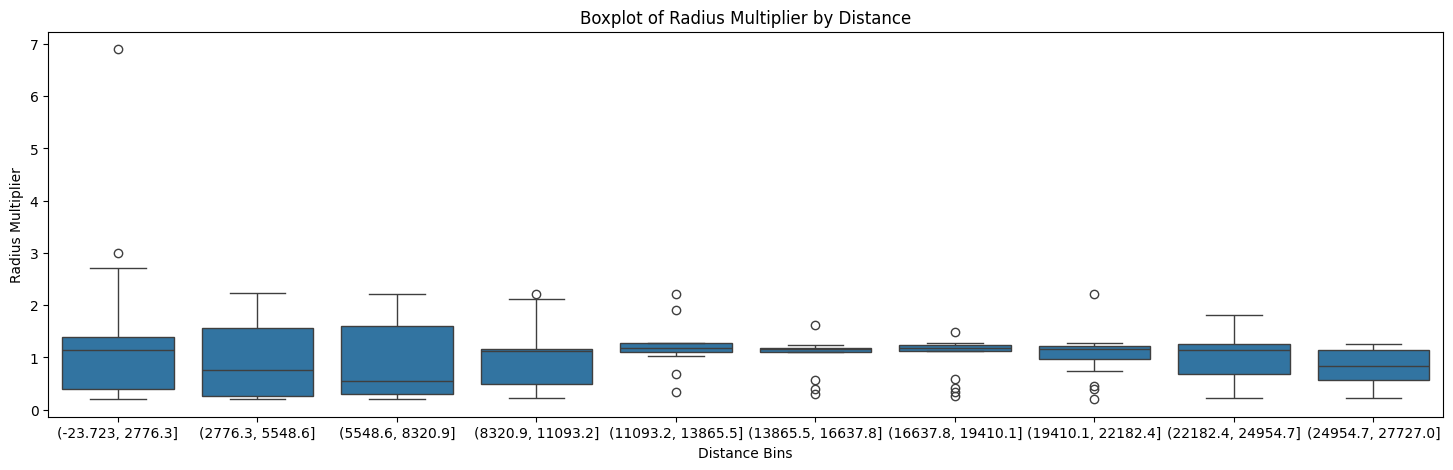

In [9]:
# 3. 盒子图
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 data 是您的数据框，包含 'distance' 和 'radius_multiplier' 列

# 设置图形尺寸
plt.figure(figsize=(18, 5))

# 将 'distance' 列分箱，以便创建盒图
dist = pd.cut(data['distance'], 10)

# 将 dist 和 radius_multiplier 组合成一个 DataFrame
combined_data = pd.DataFrame({'Distance Bins': dist, 'Radius Multiplier': data['radius_multiplier']})

# 创建盒图
sns.boxplot(x='Distance Bins', y='Radius Multiplier', data=combined_data)

# 添加标题和标签
plt.title('Boxplot of Radius Multiplier by Distance')
plt.xlabel('Distance Bins')
plt.ylabel('Radius Multiplier')

# 显示图形
plt.show()

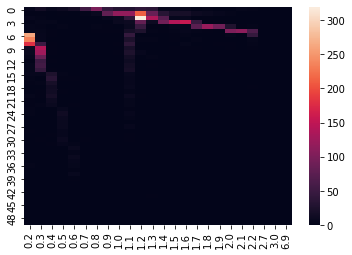

In [ ]:
df = pd.DataFrame(data, columns=['mass_multiplier', 'radius_multiplier'])
df = df.dropna(axis=0,how='any')
mass = df.loc[:, 'mass_multiplier'] = round(df.loc[:, 'mass_multiplier'])
radius = df.loc[:, 'radius_multiplier'] = round(df.loc[:, 'radius_multiplier'], 1)
#mass = mass[~np.isnan(mass)]
#radius = radius[~np.isnan(radius)]
group = df.groupby(by=['mass_multiplier', 'radius_multiplier']).size()
mass = np.sort(mass.unique())
radius = np.sort(radius.unique())
temp = np.zeros((mass.shape[0], radius.shape[0]))
for i in range(mass.shape[0]):
  for j in range(radius.shape[0]):
    if (mass[i], radius[j]) in group:
      temp[i][j] = group[mass[i]][radius[j]]
    else:
      temp[i][j] = 0

data_pack = pd.DataFrame(temp, columns=list(radius))
sns.heatmap(data_pack)


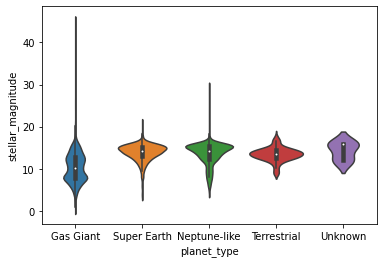

In [ ]:
df = pd.DataFrame(data, columns=['planet_type', 'stellar_magnitude']).dropna(axis=0,how='any')
sns.violinplot(x=df['planet_type'], y=df['stellar_magnitude'])